In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [84]:
file_path = r"C:\Users\yasin\OneDrive\Desktop\intrn_corizo\Project 2  - Spotify Songs’ Genre Segmentation\spotify dataset.csv" # Update this to file path
df = pd.read_csv(file_path)

df.value_counts()

track_id                track_name                track_artist       track_popularity  track_album_id          track_album_name                                                                  track_album_release_date  playlist_name                                                          playlist_id             playlist_genre  playlist_subgenre  danceability  energy  key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence  tempo    duration_ms
0017A6SJgTbfQVU2EtsPNo  Pangarap                  Barbie's Cradle    41                1srJQ0njEQgd8w4XSqI4JQ  Trip                                                                              2001-01-01                Pinoy Classic Rock                                                     37i9dQZF1DWYDQ8wBxd7xt  rock            classic rock       0.682         0.401   2    -10.068   1     0.0236       0.27900       0.011700          0.0887    0.566    97.091   235440         1
5GoaMYsGRwJa1kHT2WL6Hw  Search and Destro

In [85]:
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [86]:
data=df.dropna()
data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [87]:
data.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [88]:
df= data
df.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [89]:
duplicates = df.duplicated(subset=["track_name","track_artist"])
print("Duplicate Rows:")
print(df[duplicates].head())

Duplicate Rows:
                   track_id  \
193  3BOcWxFUURAomDXRSDFve4   
209  4TIkSdsNSfqpuq6ZYvCjAz   
232  3sHuIjfAzluc6S9cXoqfqC   
272  36orMWv2PgvnzXsd5CJ0yL   
294  7rpyHKSH3dkrsKEgv1eNgv   

                                            track_name      track_artist  \
193                                     Something Real  Armin van Buuren   
209         All You Need To Know (feat. Calle Lehmann)           Gryffin   
232                                       Let It Be Me        Steve Aoki   
272                           Post Malone (feat. RANI)         Sam Feldt   
294  Woke Up Late (feat. Hailee Steinfeld) - Sam Fe...      Drax Project   

     track_popularity          track_album_id  \
193                58  5cqwXF2j9LkvFInBFlnQd3   
209                68  2IAVHJdaRPFA6MQqXHoG75   
232                23  5ocW53VBnOprl6EAMOLGet   
272                75  45nsubB5EsRVWWqx0ED1ET   
294                56  5VW1WffQj2SqKUhwnNq1xJ   

                                      track_a

In [90]:
data = data.drop_duplicates(subset=["track_name","track_artist"])
print("\nDataFrame after removing duplicates:")
data


DataFrame after removing duplicates:


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


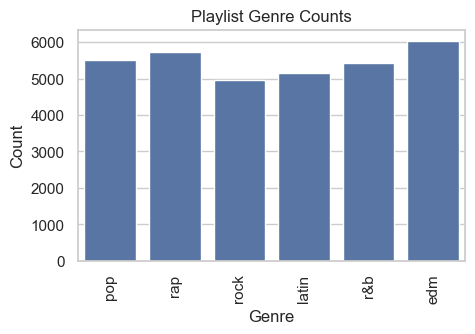

In [91]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='playlist_genre')
plt.title('Playlist Genre Counts')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

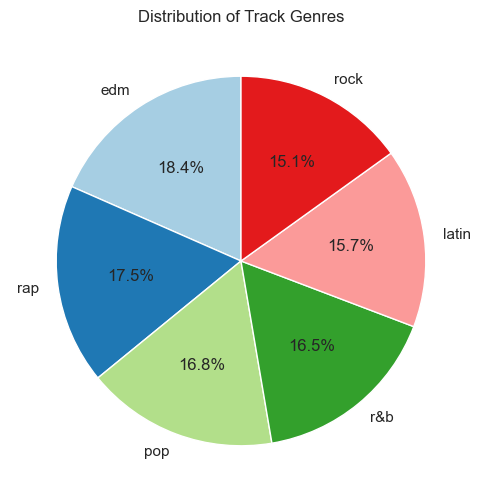

In [92]:
# Count the number of occurrences for each track genre
genre_counts = df['playlist_genre'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Track Genres')
plt.show()

In [93]:
# Data Preprocessing

# Handling missing values
spotify_data_cleaned = df.dropna()

# Convert 'track_album_release_date' to datetime format
spotify_data_cleaned['track_album_release_date'] = pd.to_datetime(spotify_data_cleaned['track_album_release_date'],format='mixed')

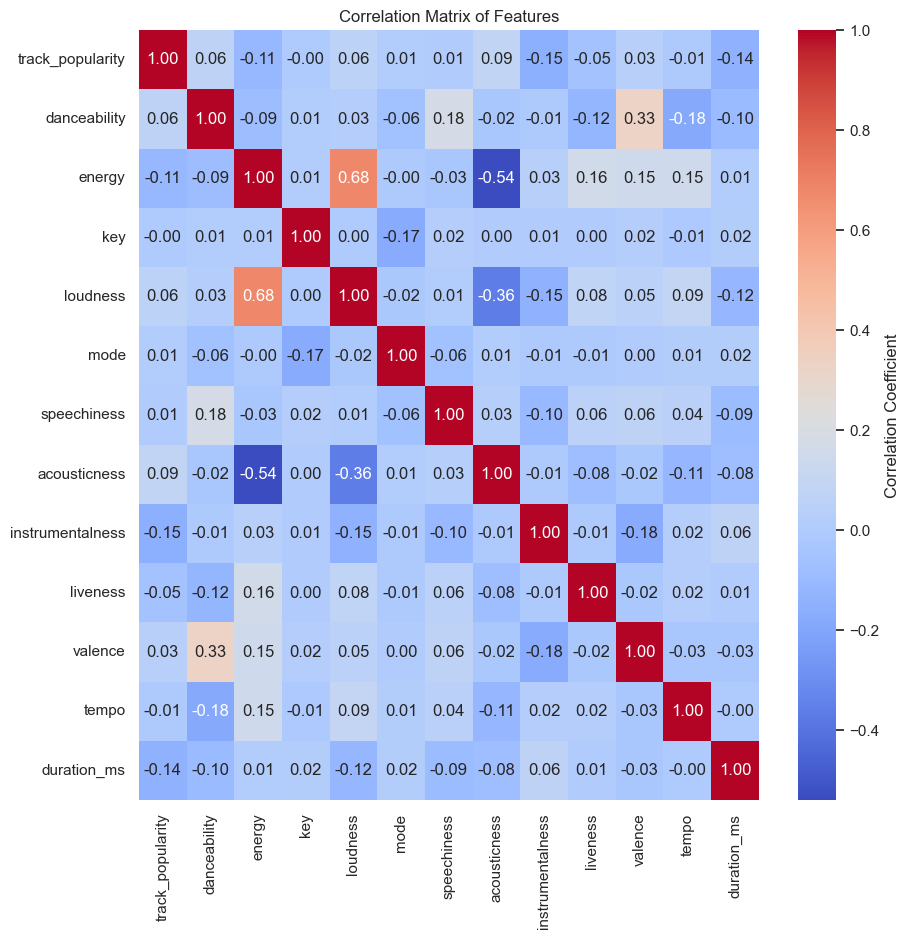

In [109]:
# Co relation matrix 
corr_matrix = spotify_data_cleaned.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Features')
plt.show()

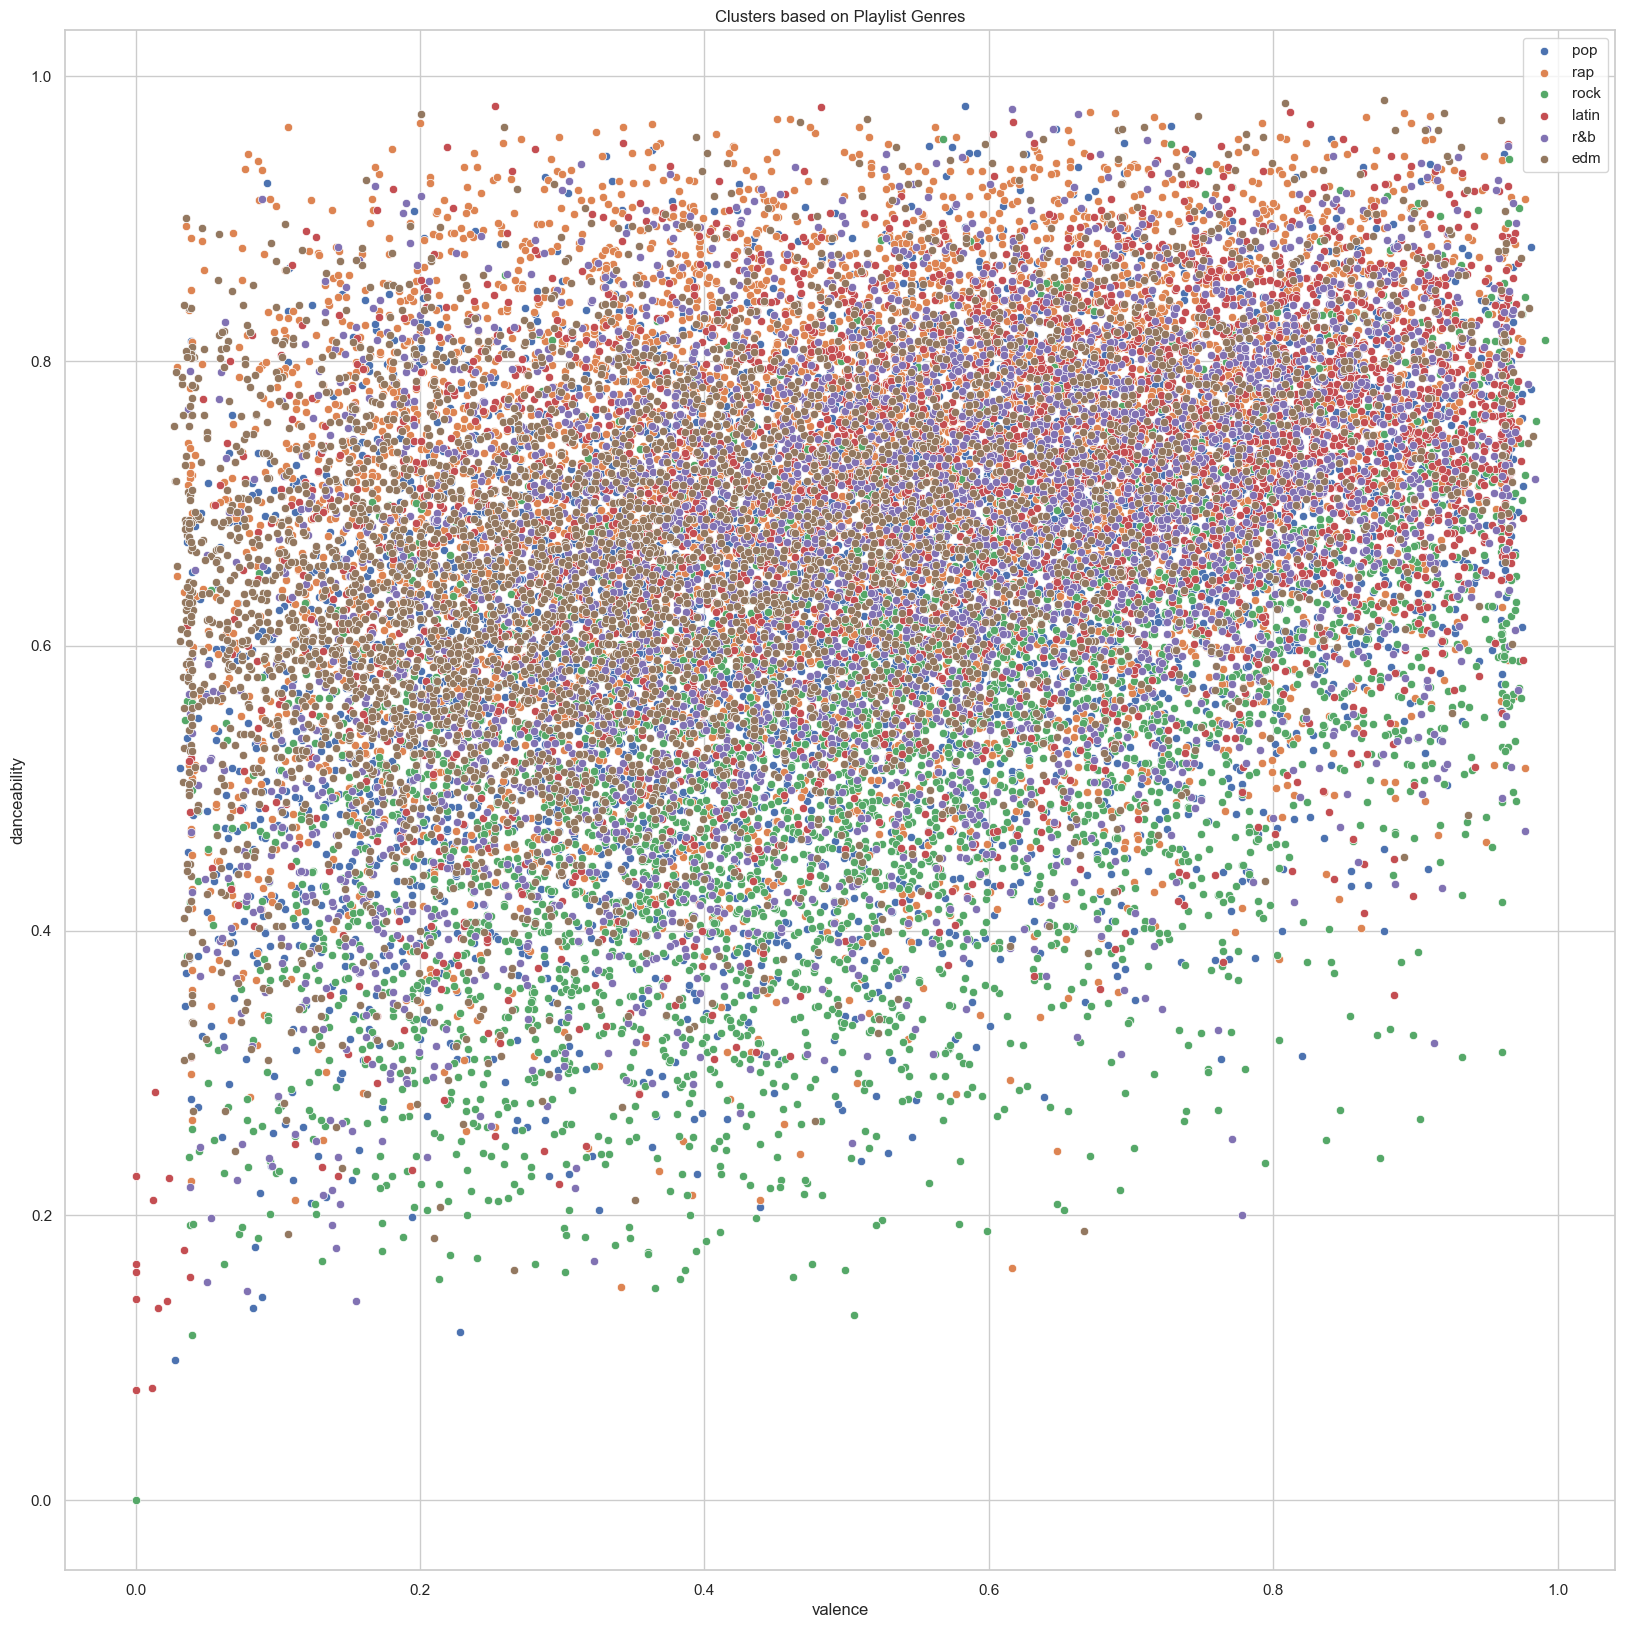

In [95]:
# Clustering based on playlist genres
plt.figure(figsize=(20, 20))
playlist_genres = data['playlist_genre'].unique()
for genre in playlist_genres:
    genre_data = data[data['playlist_genre'] == genre]
    sns.scatterplot(x='valence', y='danceability', data=genre_data, label=genre)
plt.title('Clusters based on Playlist Genres')
plt.legend()
plt.show()

<Figure size 2000x8000 with 0 Axes>

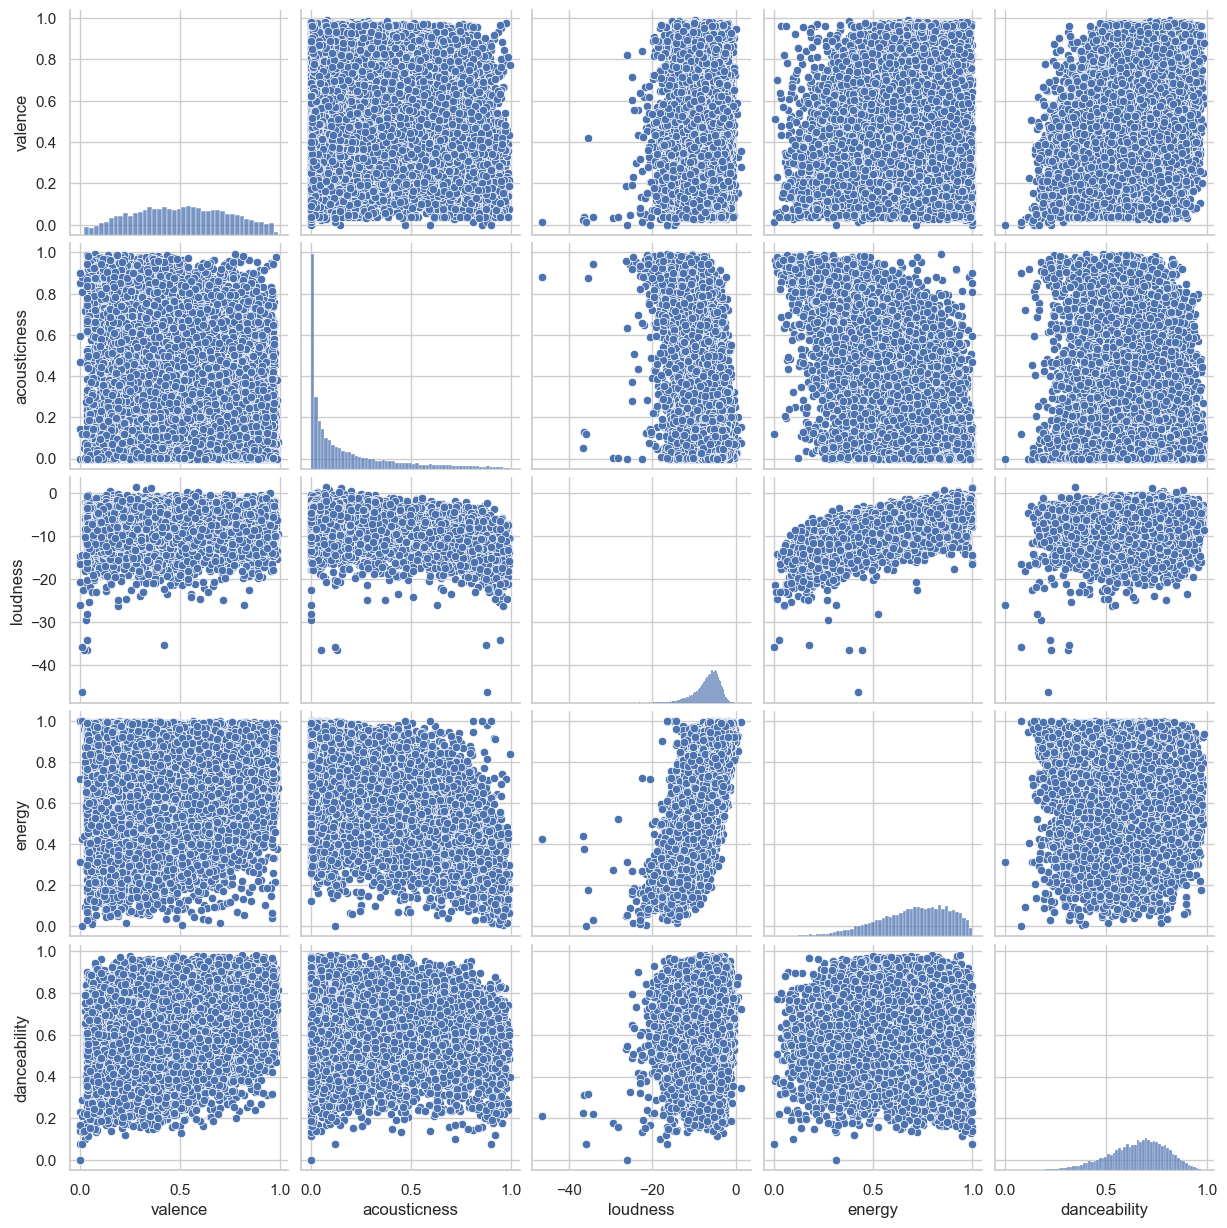

In [96]:
# Popularity of Genres with respect to the various features
plt.figure(figsize=(20, 80))
sns.set(style="whitegrid")
cols = ["valence","acousticness","loudness","energy","danceability" ]
sns.pairplot(data[cols], height = 2.5 )
plt.show();

In [97]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=6)
km.fit(df[["valence","energy"]])

KMeans(n_clusters=6)

In [98]:
km.cluster_centers_

array([[0.23872049, 0.81301061],
       [0.74575269, 0.57446428],
       [0.22720447, 0.41955202],
       [0.5287423 , 0.82689722],
       [0.46786382, 0.55504906],
       [0.80725985, 0.82386898]])

In [99]:
df["cluster_group"]=km.labels_
df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster_group
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,3
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,5
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,3
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,0
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,0
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,3
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,3
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,0


<Axes: xlabel='valence', ylabel='energy'>

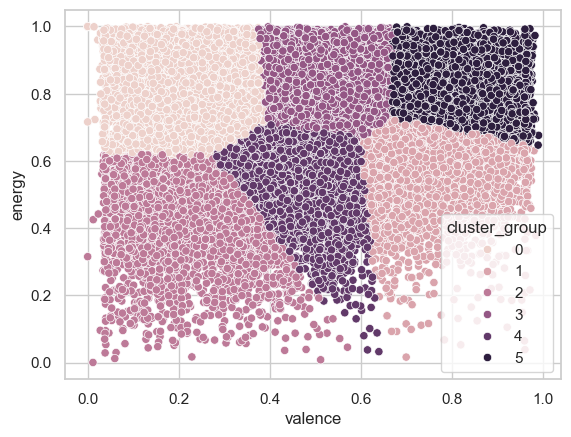

In [100]:
sns.scatterplot(x="valence",y="energy",hue="cluster_group",data=df)

<Axes: xlabel='danceability', ylabel='valence'>

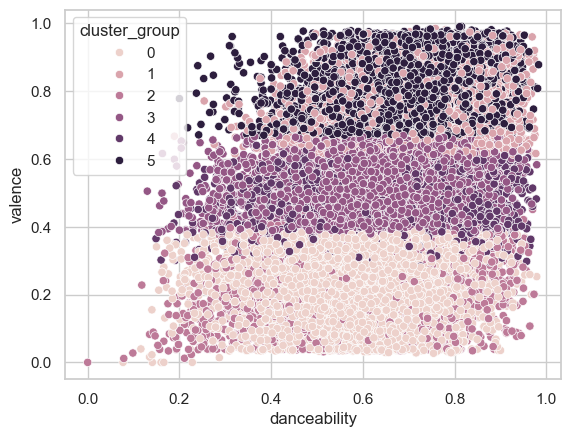

In [101]:
sns.scatterplot(x="danceability",y="valence",hue="cluster_group",data=df)

In [102]:


df['cluster_group'].value_counts()


cluster_group
3    7163
0    6110
5    5949
4    5455
1    4463
2    3688
Name: count, dtype: int64

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26229 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  26229 non-null  object 
 1   track_name                26229 non-null  object 
 2   track_artist              26229 non-null  object 
 3   track_popularity          26229 non-null  int64  
 4   track_album_id            26229 non-null  object 
 5   track_album_name          26229 non-null  object 
 6   track_album_release_date  26229 non-null  object 
 7   playlist_name             26229 non-null  object 
 8   playlist_id               26229 non-null  object 
 9   playlist_genre            26229 non-null  object 
 10  playlist_subgenre         26229 non-null  object 
 11  danceability              26229 non-null  float64
 12  energy                    26229 non-null  float64
 13  key                       26229 non-null  int64  
 14  loudness   

In [104]:
from sklearn.cluster import KMeans

# Example: Cluster songs based on playlist genres

X = df[['valence','energy','speechiness','acousticness','loudness','danceability','key']]  # Select relevant features

kmeans = KMeans(n_clusters=6)
df['genre_cluster'] = kmeans.fit_predict(X)

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, df['playlist_genre'], test_size=0.2)
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [106]:
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.49208041425525434


In [111]:


user_input = pd.DataFrame({'valence': [4.773],'energy': [1.759],'speechiness': [0.0347],'acousticness': [0.293],'loudness': [-3.73],
                           'danceability': [0.718],'key': [6]})
recommended_genre = model.predict(user_input)
recommended_songs = data[data['playlist_genre'] == recommended_genre[0]]
print(recommended_genre)



recommended_songs.head(2)[['track_name','track_artist']]

['rock']


,track_name,track_artist
11254,Shadow Of Your Love,Guns N' Roses
11256,It's So Easy,Guns N' Roses
